In [2]:
import pandas as pd
import numpy as np
import os
import re
from quasinet.qnet import Qnet, qdistance, membership_degree, export_qnet_tree,load_qnet, qdistance_matrix, save_qnet
from quasinet.qsampling import qsample, targeted_qsample
import subprocess
EMBED='/home/ishanu/Dropbox/ZED/Research/data_smashing_/bin/embed '
import seaborn as sns
import random
from tqdm import tqdm
from pqdm.processes import pqdm                                                                     
from sklearn import metrics
import pylab as plt
from sklearn.decomposition import PCA


In [3]:
COLSA=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,68,69,70,72,73,78,80,86,87,88,89,90,94,95,96,97,98,99,100,102,103,125,126,127,128,129,130,209,210,211,212,213,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,39,40,41,42,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,134,137,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,189,190,191,193,195,196,200,201,202,203,205,206,208,177,183,185,186,187,188]
COLSA=np.array(COLSA).astype(int)-1
len(COLSA)

169

In [4]:
xf=pd.read_csv('cjust/SA.dat',sep=' ',header=None,index_col=0,names=['data'])
pd.DataFrame([list(x[0]) for x in xf.values]).to_csv('cjust/SA.csv',index=None)

In [5]:
xf=pd.read_csv('cjust/JAIL.dat',header=None,names=['data'])
pd.DataFrame([list(x[0]) for x in xf.values]).to_csv('cjust/JAIL.csv',index=None)

In [6]:
jf=pd.read_csv('cjust/JAIL.csv')
jf=jf.astype(str).replace('0','')
Xj = jf.values.astype(str)[:]

In [7]:
df=pd.read_csv('cjust/SA.csv')
df=df.iloc[:,COLSA]
df=df.astype(str).replace('0','')
X = df.values.astype(str)[:]


In [8]:
qnetj = Qnet(n_jobs=12,feature_names=df.columns.values).fit(Xj)

In [9]:
qnet = Qnet(n_jobs=12,feature_names=df.columns.values).fit(X)

In [10]:
save_qnet(qnet,'cjustSA.joblib')
save_qnet(qnetj,'cjustJAIL.joblib')

In [11]:
# test qdistance calculation
seq1 = X[1]
seq2 = Xj[20]

qdist = qdistance(seq1, seq2,qnet,qnet) 
qdistj = qdistance(seq1, seq2,qnet,qnetj) 
qdistjj = qdistance(seq1, seq2,qnetj,qnetj) 
print(qdist,qdistj,qdistjj)

0.2533204813269128 0.7585819509236776 0.029333241264089625


In [12]:
n=475
Nsteps0=100
Nsteps=1000

index1 = np.random.choice(X.shape[0], n, replace=False)  
index2 = np.random.choice(Xj.shape[0], n, replace=False)  
index1a = np.random.choice(X.shape[0], n, replace=False)  


Xj_=Xj[index2]
X_=X[index1]

A=pd.DataFrame(X_).replace('',np.nan).values.astype(float)*(1/((Xj_=='').astype(int)))
A1=pd.DataFrame(A).replace(np.inf,np.nan).fillna('').astype(str)#
X__=A1.replace({'\.0': ''},regex=True).values.astype(str)[:]

X_=X[index1a]
A=pd.DataFrame(X_).replace('',np.nan).values.astype(float)*(1/((Xj_=='').astype(int)))
A1=pd.DataFrame(A).replace(np.inf,np.nan).fillna('').astype(str)#
X__a=A1.replace({'\.0': ''},regex=True).values.astype(str)[:]

 
X_=np.concatenate( (X__, X__a,
                     Xj_), axis=0)

LABEL=np.concatenate((np.zeros(len(index1)),np.zeros(len(index1)),np.ones(len(index2))))

In [32]:
X____=np.concatenate( (X,Xj), axis=0)
LABEL____=np.concatenate((np.zeros(len(X)),np.ones(len(Xj))))

In [ ]:
# generate distanec matrix
H=qdistance_matrix(X_,X_, qnet, qnet)

In [51]:
pd.DataFrame(H).to_csv('cjust/HMATqsaqsa.csv',index=None,header=None,sep=' ')
H.shape

(1425, 1425)

In [52]:
# generate distanec matrix
Hall=qdistance_matrix(X____,X____, qnet, qnet)

pd.DataFrame(Hall).to_csv('cjust/HMATall.csv',index=None,header=None,sep=' ')
Hall.shape

(1503, 1503)

In [21]:
# generate distanec matrix
Hjail=qdistance_matrix(X_,X_, qnetj, qnetj)

pd.DataFrame(Hjail).to_csv('cjust/HMATqjailqjail.csv',index=None,header=None,sep=' ')
Hjail.shape

(1425, 1425)

In [33]:
# generate distanec matrix
Hjailall=qdistance_matrix(X____,X____, qnetj, qnetj)

pd.DataFrame(Hjailall).to_csv('cjust/HMATqjailqjailall.csv',index=None,header=None,sep=' ')
Hjailall.shape

(1503, 1503)

In [53]:
# calculate sippl embedding

PREF='./cjust/'
FILE='HMATall.csv'
DATAFILE=PREF+FILE#'data_'
EFILE=PREF+'_Eb1_all'
DFILE=PREF+'_Db1_all'
PCAEFILE=PREF+'_PEb1_all'

In [54]:
STR=EMBED+' -f '+DATAFILE+' -E '+EFILE+' -D '+DFILE
subprocess.call(STR,shell=True);

<AxesSubplot:>

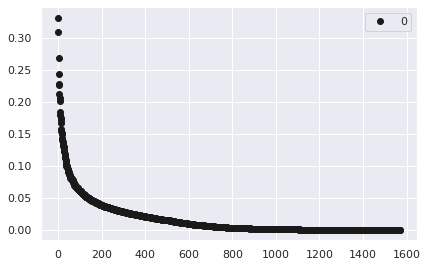

In [55]:
# plot dimensional error
pd.read_csv(DFILE,sep=' ',header=None).transpose().plot(style='ko')

<AxesSubplot:xlabel='x1', ylabel='x2'>

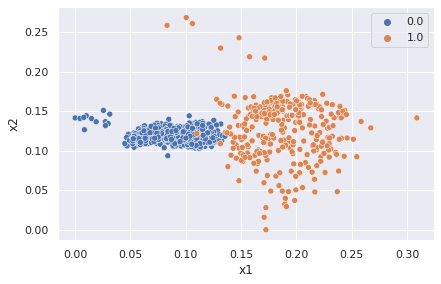

In [56]:
# get embedding matrix
E=pd.read_csv(EFILE,sep=' ',header=None).dropna(axis=1).transpose()
E.columns=['x'+str(i) for i in E.columns]
E.to_csv(PREF+'Eb1all.csv')
sns.scatterplot(E.x1,E.x2,hue=LABEL____)

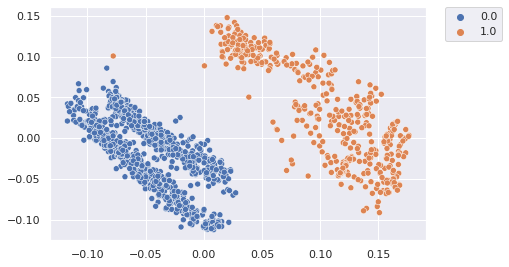

In [57]:
Ef=pd.read_csv(EFILE,sep=' ',header=None).dropna(axis=1).transpose()
Ef.columns=['x'+str(i) for i in Ef.columns]
xf=Ef#.assign(IF=dx.ido)

pca = PCA(n_components=2).fit(xf)
ef=pca.fit_transform(xf)

pd.DataFrame(ef).to_csv(PCAEFILE,header=None,index=None)

sns.scatterplot(x=ef[:,0],y=ef[:,1],hue=LABEL____);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

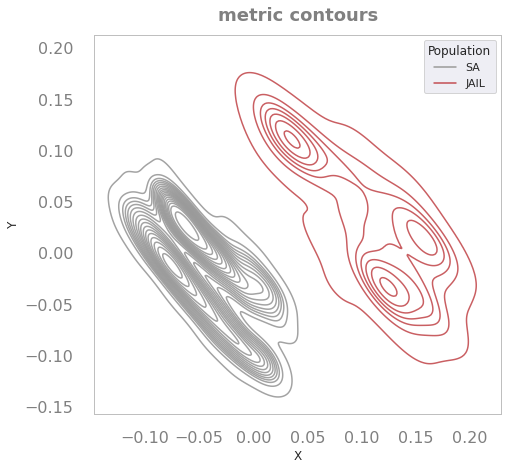

In [63]:
def varname(x):
    if x:
        return 'JAIL'
    return 'SA'
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=[6.5,6.5])
sns.set()

ax=plt.gca()

pf=pd.DataFrame(ef,columns=['X','Y']).assign(ido=LABEL____)
pf['Population']=(pf.ido==1)
pf['Population']=[varname(x) for x in pf.Population]
ax=sns.kdeplot(x='X',y='Y',fill=False,data=pf,alpha=.9,lw=3,
               levels=20,hue='Population',thresh=.01,palette=['.6','r'],fontsize=16)

ax.set_title('metric contours',fontsize=18,fontweight='bold',y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
#plt.setp(ax2.get_yticklabels(), fontsize=16)
#plt.gca().set_xlabel('% reduction in error', fontsize=16,color='.5')
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
##ax.set_xlim(-100,100);
ax.grid(color='#dddddd', linestyle='--', linewidth=2)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
#ax.set_ylabel('density',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)


plt.savefig('dxcontour_all'+'.png',dpi=600,bbox_inches='tight',transparent=True)

In [64]:
! pwd

/home/ishanu/ZED/Research/zcad/qanalysis
